In [1]:
import platform, sys, os

# Variables

In [5]:
## Seed for the random variables
seed_number=0;

## Kfold 
K=5;                    # Variable K of kfold
enable_stratified=True; # True: Stratified kfold False: Enable kfold 

## Training hyperparameters
EPOCAS=50;
BATCH_SIZE=32;#32

## Model of network
model_type  = 'mobilenet_v3';
#model_type = 'efficientnet_b3'
#model_type = 'inception_v3';
#model_type = 'inception_resnet_v2';
#model_type = 'resnet_v2_50';
#model_type = 'custom1'
#model_type = 'custom_inception'
#model_type = 'custom_residual1'
#model_type = 'custom_dense1'

dataset_labels_file = 'training_labels.csv';

# Bibliotecas externas

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

In [7]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Biblioteca local


In [8]:
sys.path.append('library');

# Endereços

In [9]:
## Dataset 
if platform.system()=='Linux':
    dataset_base_dir    = '/mnt/c/Dados/Fernando/DATASET/fer2013/archive/train';
else:
    dataset_base_dir    = 'C:\\Dados\\Fernando\\DATASET\\fer2013\\archive\\train';


## Output
if platform.system()=='Linux':
    output_base_dir = '/mnt/c/Dados/Fernando/OUTPUTS/cnn_face_emotion/cross-validation';
else:
    output_base_dir = 'C:\\Dados\\Fernando\\OUTPUTS\\cnn_face_emotion\\cross-validation';

# If command line

In [10]:
for n in range(len(sys.argv)):
    if sys.argv[n]=='--model':
        model_type=sys.argv[n+1];
        
print('model_type:',model_type)

model_type: mobilenet_v3


# Set seed of random variables


In [11]:
np.random.seed(seed_number)
tf.keras.utils.set_random_seed(seed_number);

# Setting the cross-validation kfold


In [12]:
from sklearn.model_selection import KFold, StratifiedKFold

if enable_stratified:
    output_dir = os.path.join(output_base_dir,'skfold'+str(K)+'_'+model_type);
    kf = StratifiedKFold(n_splits = K, shuffle = True, random_state = seed_number);
else:
    output_dir = os.path.join(output_base_dir,'kfold'+str(K)+'_'+model_type);
    kf  = KFold(n_splits = K, shuffle=True, random_state=seed_number); 

# Loading data of dataset

In [13]:
# Load filenames and labels
train_data = pd.read_csv(os.path.join(dataset_base_dir,dataset_labels_file));
print(train_data)
# Setting labels
Y   = train_data[['label']];
L=np.shape(Y)[0];

                filename      label
0      disgusted/im0.png  disgusted
1            sad/im0.png        sad
2        fearful/im0.png    fearful
3        neutral/im0.png    neutral
4          angry/im0.png      angry
...                  ...        ...
28648   happy/im7210.png      happy
28649   happy/im7211.png      happy
28650   happy/im7212.png      happy
28651   happy/im7213.png      happy
28652   happy/im7214.png      happy

[28653 rows x 2 columns]


# Data augmentation configuration

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

idg    = ImageDataGenerator(rescale=1./255,
                            rotation_range = 10,
                            width_shift_range= 0.07,
                            height_shift_range= 0.07,
                            horizontal_flip=True,
                            shear_range=1.25,
                            zoom_range = [0.9, 1.1] 
                            )

idg_val= ImageDataGenerator(rescale=1./255 )



# Auxiliar function

In [15]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

# Creating output directory

In [16]:

try: 
    os.mkdir(output_dir) 
except: 
    pass


# Cross-validation


Fold 1 of 5
length: 22922


2023-03-08 16:24:07.022747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 16:24:07.026757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 16:24:07.026805: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 16:24:07.026831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_nod

Loaded layer with mobilenet_v3
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1024)              1529968   
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,562,999
Trainable params: 1,550,887
Non-trainable params: 12,112
_________________________________________________________________
Found 22922 validated image filenames belonging to 7 classes.
Found 5731 validated image filenames belonging to 7 classes.
Epoch 1/3


2023-03-08 16:26:02.308990: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-03-08 16:26:03.155643: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-08 16:26:04.363047: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-08 16:26:04.374715: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f8664da9ec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-08 16:26:04.374747: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-03-08 16:26:04.392725: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-08 16:26:04.60072

717/717 [==============================] - ETA: 0s - loss: 1.6452 - categorical_accuracy: 0.5032
Epoch 1: val_categorical_accuracy improved from -inf to 0.55086, saving model to /mnt/c/Dados/Fernando/OUTPUTS/cnn_face_emotion/cross-validation/skfold/model_1.h5
717/717 [==============================] - 316s 409ms/step - loss: 1.6452 - categorical_accuracy: 0.5032 - val_loss: 1.5138 - val_categorical_accuracy: 0.5509
Epoch 2/3
717/717 [==============================] - ETA: 0s - loss: 1.4286 - categorical_accuracy: 0.5824
Epoch 2: val_categorical_accuracy did not improve from 0.55086
717/717 [==============================] - 294s 410ms/step - loss: 1.4286 - categorical_accuracy: 0.5824 - val_loss: 1.5182 - val_categorical_accuracy: 0.5489
Epoch 3/3
717/717 [==============================] - ETA: 0s - loss: 1.3332 - categorical_accuracy: 0.6087
Epoch 3: val_categorical_accuracy improved from 0.55086 to 0.56168, saving model to /mnt/c/Dados/Fernando/OUTPUTS/cnn_face_emotion/cross-validati

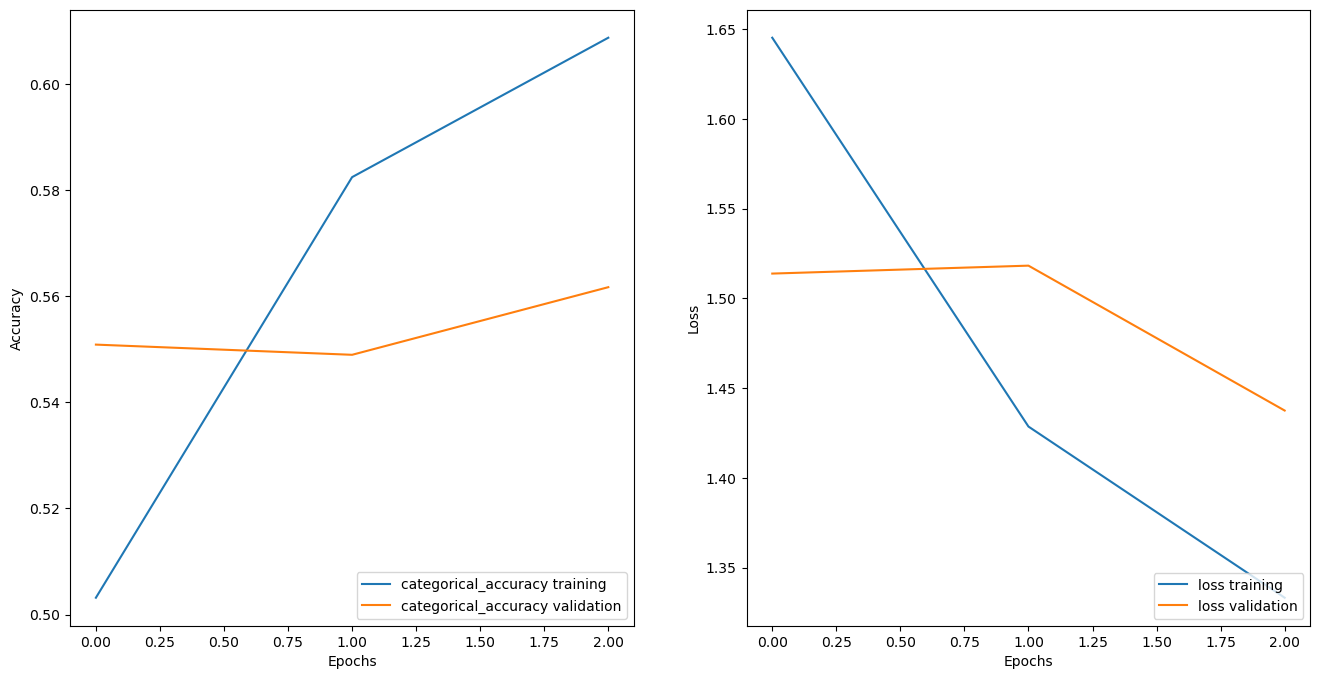

max_val_acc 0.5616821050643921
180/180 [==============================] - 32s 174ms/step - loss: 1.4375 - categorical_accuracy: 0.5617
{'loss': 1.437512755393982, 'categorical_accuracy': 0.5616821050643921} 



Fold 2 of 5
length: 22922
Loaded layer with mobilenet_v3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1024)              1529968   
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dense_1 (Dense)             (None, 7)                 231       
                                                                 
Total params: 1,562,999
Trainable params: 1,550,887
Non-trainable params: 12,112
_________________________________________________________________


In [ ]:
import lib_model as mpp
import matplotlib.pyplot as plt

VALIDATION_ACCURACY = []
VALIDATION_LOSS = []


fold_var=1;
for train_index, val_index in kf.split(np.zeros(L),Y):
    training_data   = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    print('\nFold',fold_var,'of',K);
    print('length:',len(train_index));

    # CREATE NEW MODEL
    model, target_size = mpp.create_model('',model_type=model_type);
    model.summary()
    
    train_data_generator = idg.flow_from_dataframe(training_data, 
                                                   directory = dataset_base_dir,
                                                   target_size=target_size,
                                                   x_col = "filename", 
                                                   y_col = "label",
                                                   batch_size=BATCH_SIZE,
                                                   class_mode="categorical",
                                                   shuffle = True);
    
    valid_data_generator  = idg_val.flow_from_dataframe(validation_data, 
                                                    directory = dataset_base_dir,
                                                    target_size=target_size,
                                                    x_col = "filename", 
                                                    y_col = "label",
                                                    batch_size=BATCH_SIZE,
                                                    class_mode="categorical",
                                                    shuffle = True)
    
    STEPS_BY_EPOCHS=len(train_data_generator);
    

    
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'])
    
    # CREATE CALLBACKS
    best_model_file=os.path.join(output_dir,get_model_name(fold_var));
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_file, 
                                                    save_weights_only=True,
                                                    monitor='val_categorical_accuracy', 
                                                    save_best_only=True, 
                                                    verbose=1);
    
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    history = model.fit(train_data_generator,
                        steps_per_epoch=STEPS_BY_EPOCHS,
                        epochs=EPOCAS,
                        validation_data=valid_data_generator,
                        callbacks=[checkpoint,tensorboard_callback],
                        verbose=1
                       );
    
    #PLOT HISTORY
    mpp.save_model_history(history,os.path.join(output_dir,"historical_"+str(fold_var)+".csv"), labels=['categorical_accuracy','loss'],show=False);
    
    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights(best_model_file);
    
    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))
    print(results,"\n\n");
    
    VALIDATION_ACCURACY.append(results['categorical_accuracy'])
    VALIDATION_LOSS.append(results['loss'])
    
    tf.keras.backend.clear_session()
    
    fold_var += 1

In [ ]:
fpath=os.path.join(output_dir,"final_stats.m");
mean_val_acc=mpp.save_model_stat_kfold(VALIDATION_ACCURACY,VALIDATION_LOSS, fpath);

mpp.save_model_parameters(model, os.path.join(output_dir,'parameters_stats.m'));

#os.rename(output_dir,output_dir+str(K)+'_'+model_type);
print(mean_val_acc)